In [1]:
#dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
#setting file path
file = Path("../datasets/cleaned_death_rates.csv")
death_rates_df = pd.read_csv(file)
death_rates_df.head()

,Year,State,Rate,Deaths (Raw #)
0,2021,Alabama,152.8,9491
1,2021,Alaska,109.5,763
2,2021,Arizona,139.5,12706
3,2021,Arkansas,127.7,4739
4,2021,California,99.9,44540


In [3]:
#file path for second one
file2 = Path("../datasets/cleaned_covid19_vaccinations.csv")
vaccination_df = pd.read_csv(file2)
vaccination_df.head()

,State,Total doses administered by jurisdiction,Residents with a completed primary series,Percent of total pop with a completed primary series,Residents 18+ with a completed primary series,Percent of 18+ pop with a completed primary series,Residents 65+ with a completed primary series,Percent of 65+ pop with a completed primary series
0,United States,676728782,230637348,69.5,204327579,79.1,51708613,94.4
1,Alaska,1328221,477592,65.3,418608,75.9,81999,89.5
2,Alabama,7018011,2611593,53.3,2416344,63.3,725159,85.3
3,Arkansas,4874091,1720209,57.0,1547724,66.8,440981,84.2
4,American Samoa,115281,42495,89.7,29952,95.0,2996,91.4


In [4]:
#merging the dataframes
merged_df = pd.merge(death_rates_df, vaccination_df, on = "State")
merged_df.head()

,Year,State,Rate,Deaths (Raw #),Total doses administered by jurisdiction,Residents with a completed primary series,Percent of total pop with a completed primary series,Residents 18+ with a completed primary series,Percent of 18+ pop with a completed primary series,Residents 65+ with a completed primary series,Percent of 65+ pop with a completed primary series
0,2021,Alabama,152.8,9491,7018011,2611593,53.3,2416344,63.3,725159,85.3
1,2021,Alaska,109.5,763,1328221,477592,65.3,418608,75.9,81999,89.5
2,2021,Arizona,139.5,12706,14647405,4821350,66.2,4239941,75.2,1188267,90.8
3,2021,Arkansas,127.7,4739,4874091,1720209,57.0,1547724,66.8,440981,84.2
4,2021,California,99.9,44540,88487852,29588939,74.9,25681179,83.9,5441414,93.2


In [5]:
state_vs_deaths = merged_df[["State", "Deaths (Raw #)"]]
state_vs_deaths.head()

,State,Deaths (Raw #)
0,Alabama,9491
1,Alaska,763
2,Arizona,12706
3,Arkansas,4739
4,California,44540


In [6]:
print(state_vs_deaths.columns)

Index(['State', 'Deaths (Raw #)'], dtype='object')


In [7]:
state_vs_deaths = state_vs_deaths.set_index("State")

state_vs_deaths.head()

,Deaths (Raw #)
State,
Alabama,9491
Alaska,763
Arizona,12706
Arkansas,4739
California,44540


Text(0.5, 1.0, 'COVID Related Deaths per State')

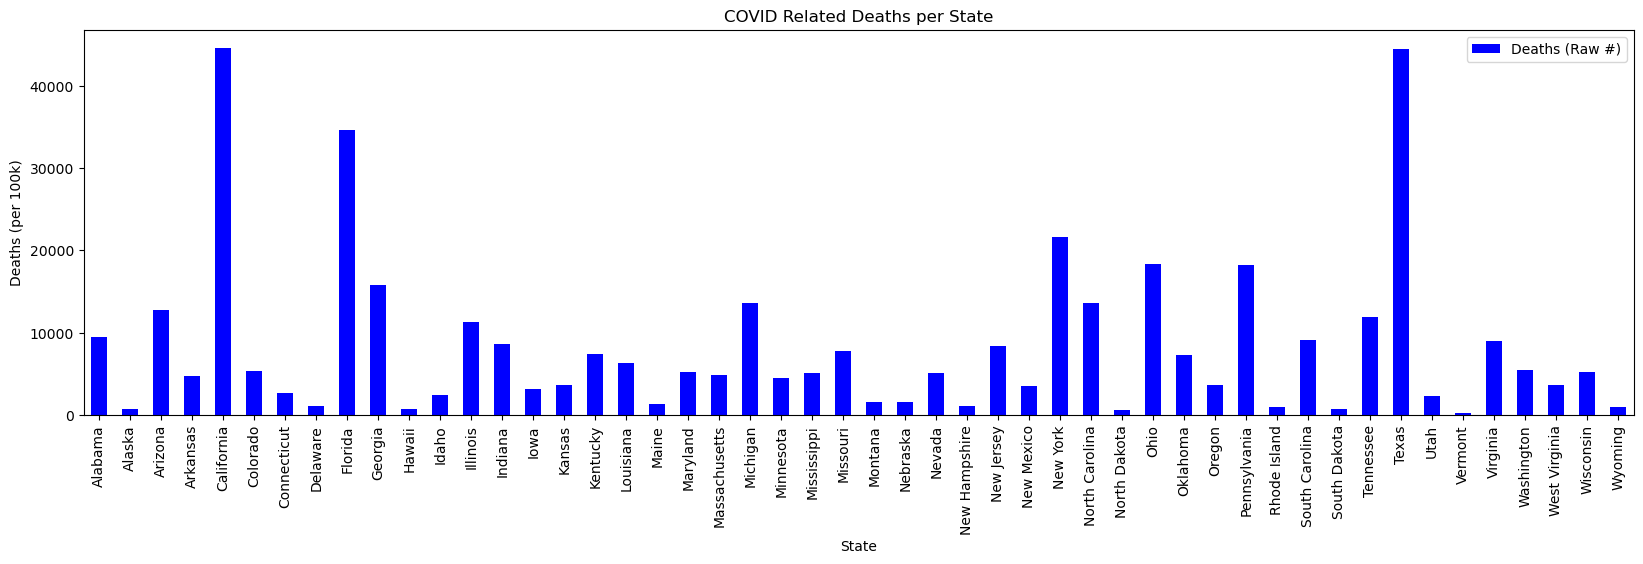

In [8]:
#creating a bar graph comparing deaths per state
deaths_bar = state_vs_deaths.plot(kind="bar", color="blue", figsize=(20,5))
plt.xlabel("State")
plt.ylabel("Deaths (per 100k)")

#set a title for the chart
plt.title("COVID Related Deaths per State")

In [9]:
state_vs_deaths2 = merged_df[["State", "Rate"]]
state_vs_deaths2.head()

,State,Rate
0,Alabama,152.8
1,Alaska,109.5
2,Arizona,139.5
3,Arkansas,127.7
4,California,99.9


In [10]:
state_vs_deaths2 = state_vs_deaths2.set_index("State")

state_vs_deaths2.head()

,Rate
State,
Alabama,152.8
Alaska,109.5
Arizona,139.5
Arkansas,127.7
California,99.9


Text(0.5, 1.0, 'COVID Related Deaths per State')

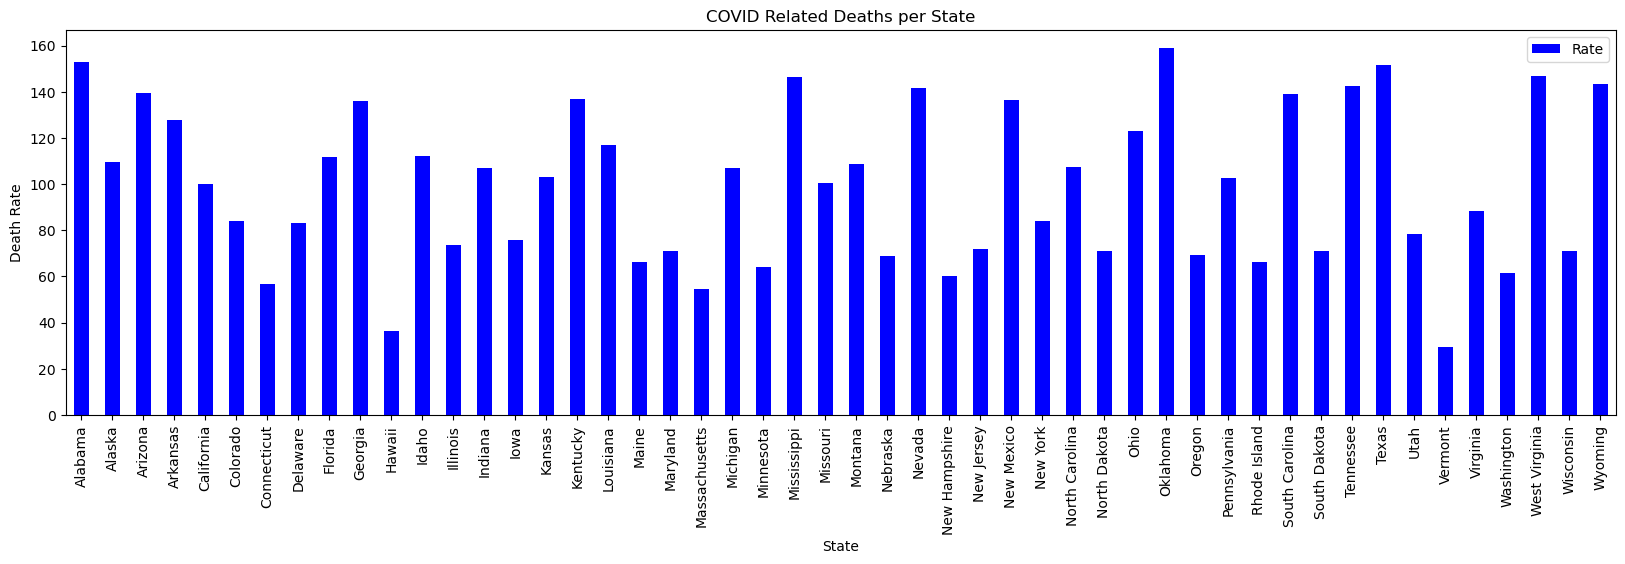

In [11]:
#creating a bar graph comparing deaths per state
deaths_bar2 = state_vs_deaths2.plot(kind="bar", color="blue", figsize=(20,5))
plt.xlabel("State")
plt.ylabel("Death Rate")

#set a title for the chart
plt.title("COVID Related Deaths per State")

In [12]:
age_vs_vaccinated = merged_df[["State", 
                               "Percent of 18+ pop with a completed primary series",
                               "Percent of 65+ pop with a completed primary series",
                              "Percent of total pop with a completed primary series"]]
age_vs_vaccinated.head()

,State,Percent of 18+ pop with a completed primary series,Percent of 65+ pop with a completed primary series,Percent of total pop with a completed primary series
0,Alabama,63.3,85.3,53.3
1,Alaska,75.9,89.5,65.3
2,Arizona,75.2,90.8,66.2
3,Arkansas,66.8,84.2,57.0
4,California,83.9,93.2,74.9


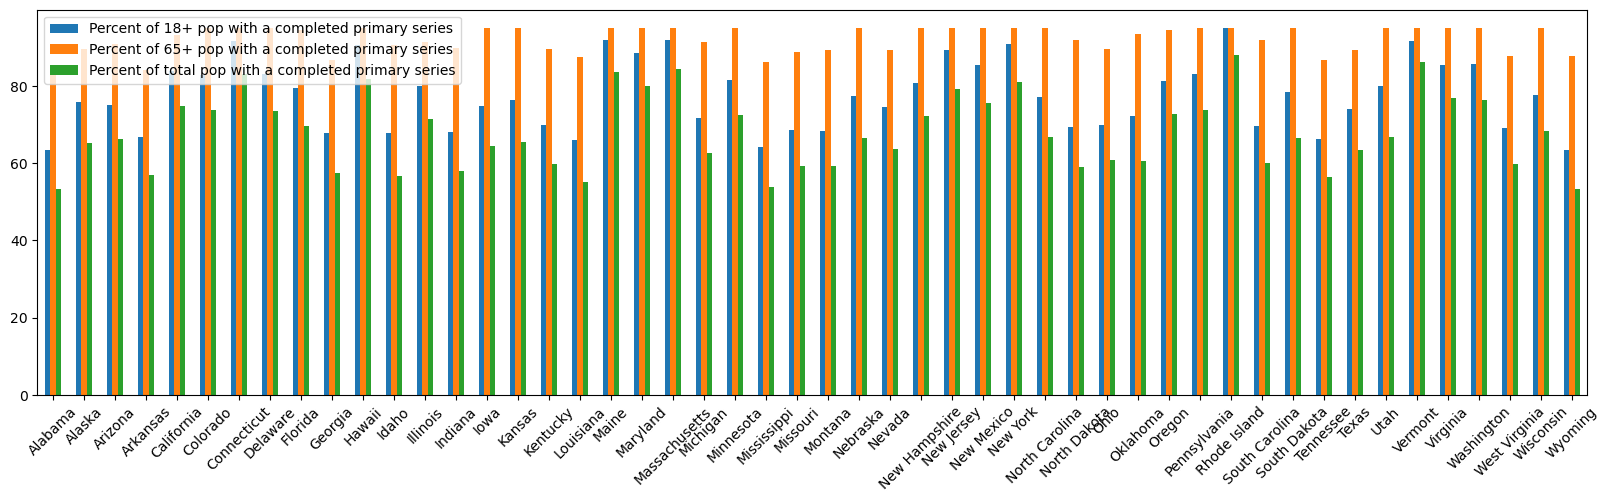

In [13]:
#creating a multi bar graph comparing vaccination by age per state
multi_plot = age_vs_vaccinated.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(age_vs_vaccinated["State"], rotation=45)

plt.show()

What this graph answers:
The percent of individuals 65+ who are fully vaccinated per state is typically higher than the overall percent of adults 18+ vaccinated and the total population

It also shows us general comparisons between each age group. The percent of the population fully vaccinated in each state is typically lower than in the adult age group (18+) and the senior age group (65+).

In [14]:
#dataframe to compare rate and overall residents with a completed primary series
death_vs_vaccination = merged_df[["State", "Rate", "Percent of total pop with a completed primary series"]]
death_vs_vaccination.head()

,State,Rate,Percent of total pop with a completed primary series
0,Alabama,152.8,53.3
1,Alaska,109.5,65.3
2,Arizona,139.5,66.2
3,Arkansas,127.7,57.0
4,California,99.9,74.9


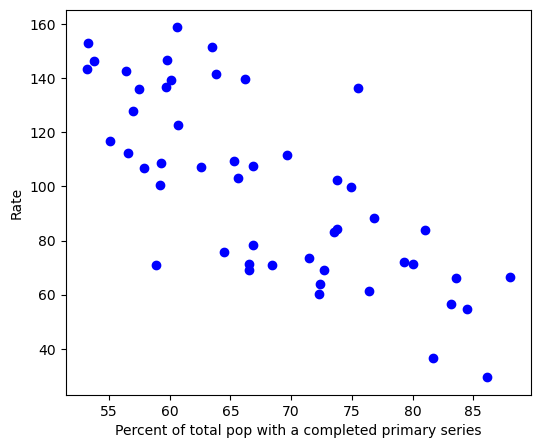

In [15]:
#scatter plot to show if vaccination rate and death are correlated
fig1, ax1 = plt.subplots(figsize=(6, 5))
plt.scatter(death_vs_vaccination["Percent of total pop with a completed primary series"], 
            death_vs_vaccination["Rate"], color="blue")
plt.xlabel("Percent of total pop with a completed primary series")
plt.ylabel("Rate")

plt.show()

The correlation between death rate and the percent of the total population with a completed primary series is: -0.75


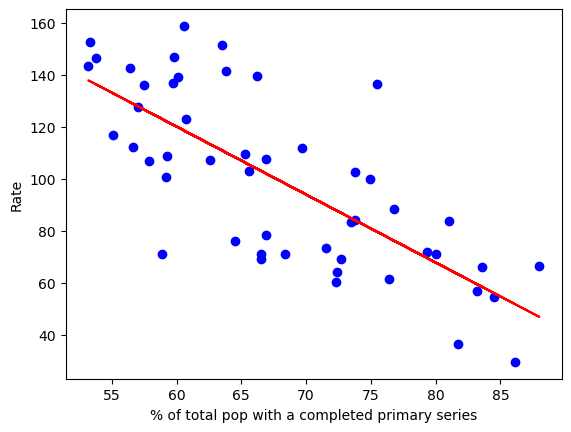

In [16]:
#building the line regression equation and held the x and y values in a variable so it was easier to plot
#without having to retype
x_values = death_vs_vaccination["Percent of total pop with a completed primary series"]
y_values = death_vs_vaccination["Rate"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print statement for pearsonr
correlation = round(st.pearsonr(death_vs_vaccination["Percent of total pop with a completed primary series"], 
                                death_vs_vaccination["Rate"])[0],2)
print(f"The correlation between death rate and the percent of the total population with a completed primary series is: {correlation}")

#plotting the same scatter with the regression line
plt.scatter(death_vs_vaccination["Percent of total pop with a completed primary series"], death_vs_vaccination["Rate"], color="blue")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), color = "red")
plt.xlabel("% of total pop with a completed primary series")
plt.ylabel("Rate")
plt.show()

In examining the relationship between total population vaccination rate and death rates, the r-value was calculated to be -0.75. As you can see, as the % of the total population with a completed primary series increases (x value), the death rate decreases (y value) and vice versa. With an r-value of -0.75, this can be considered a strong correlation between the two variables.